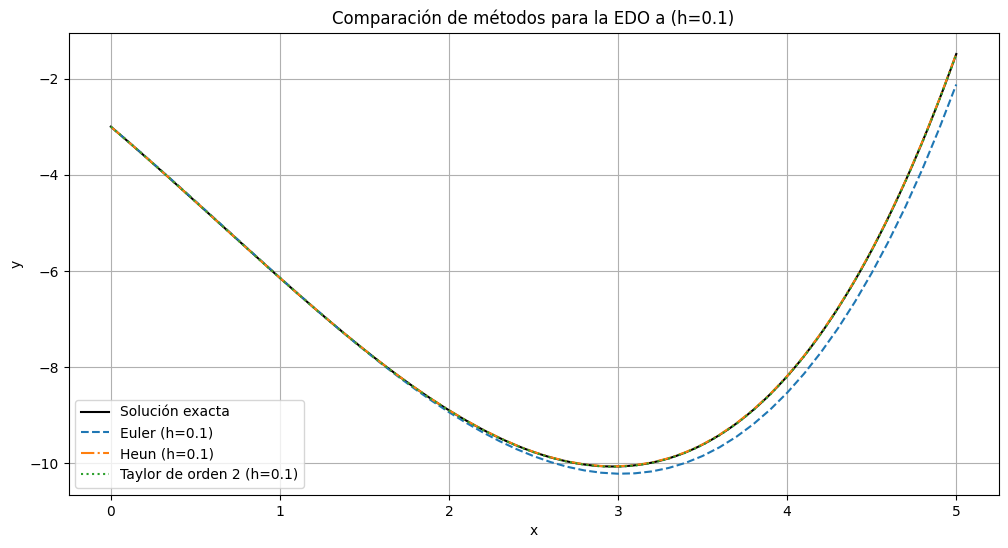

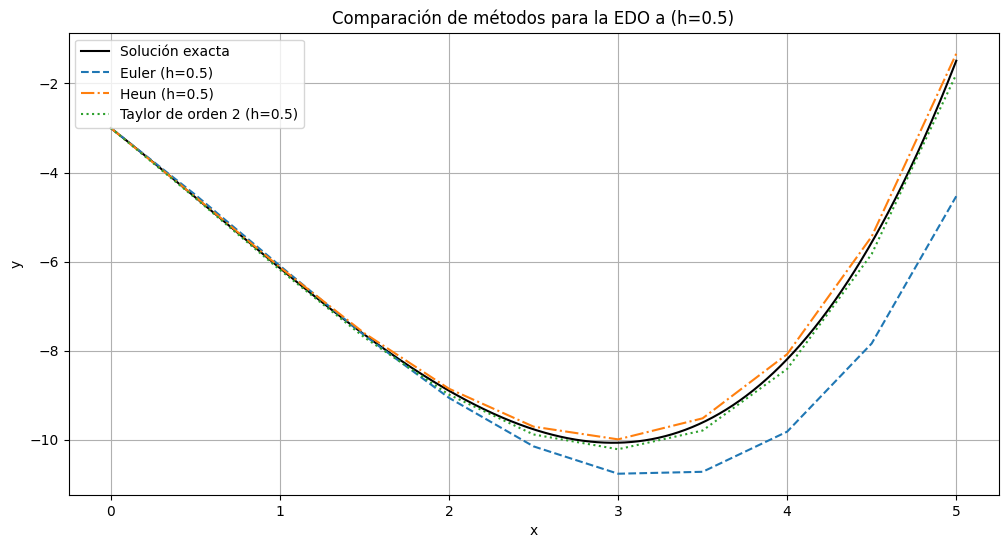

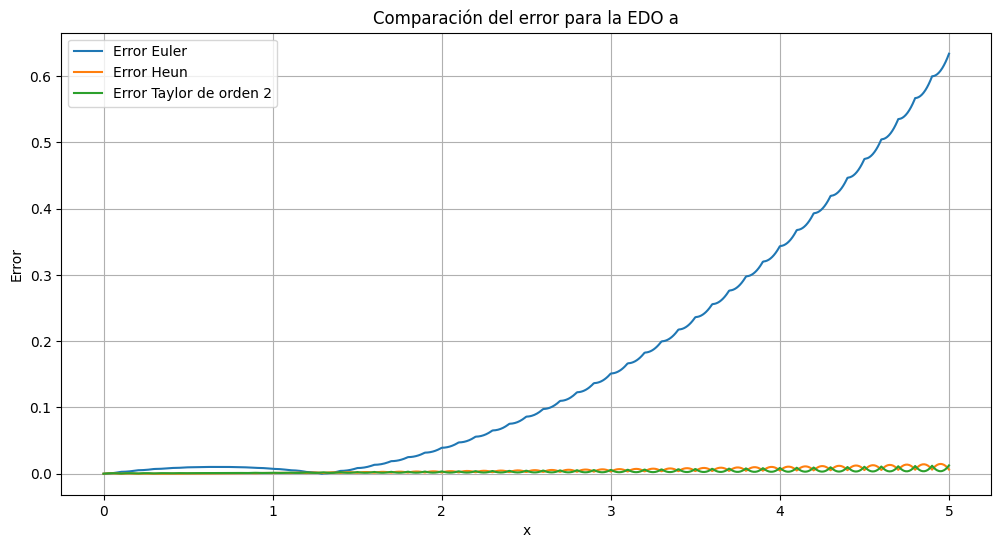

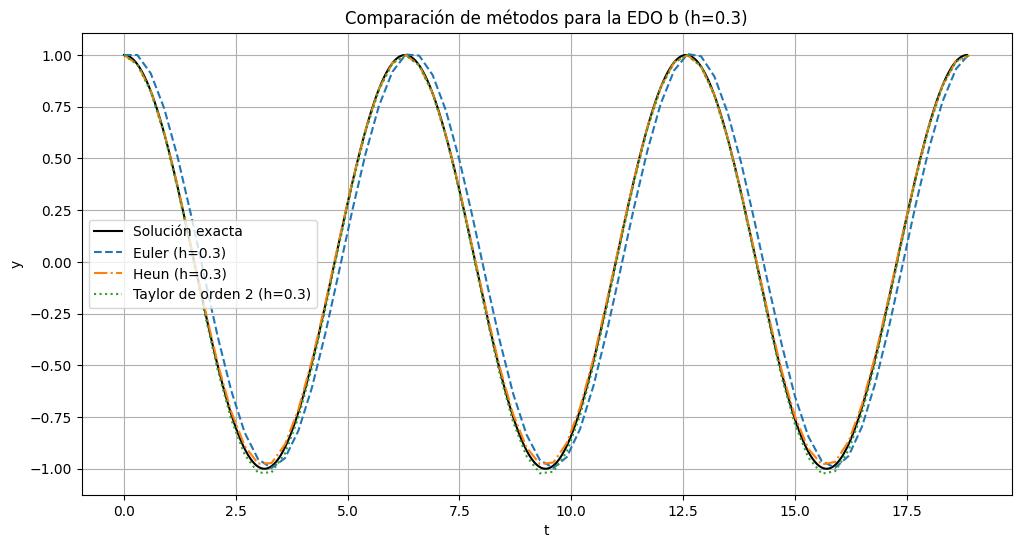

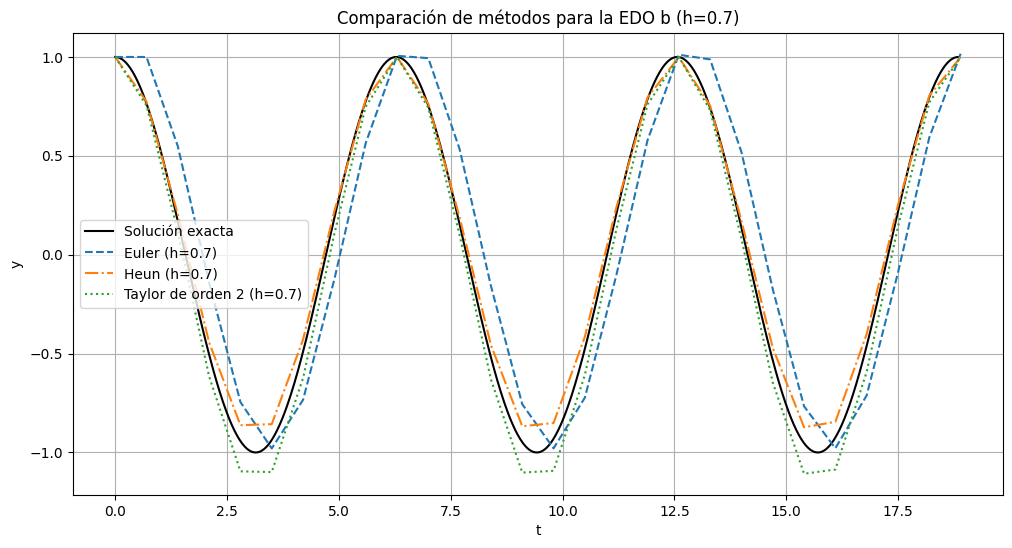

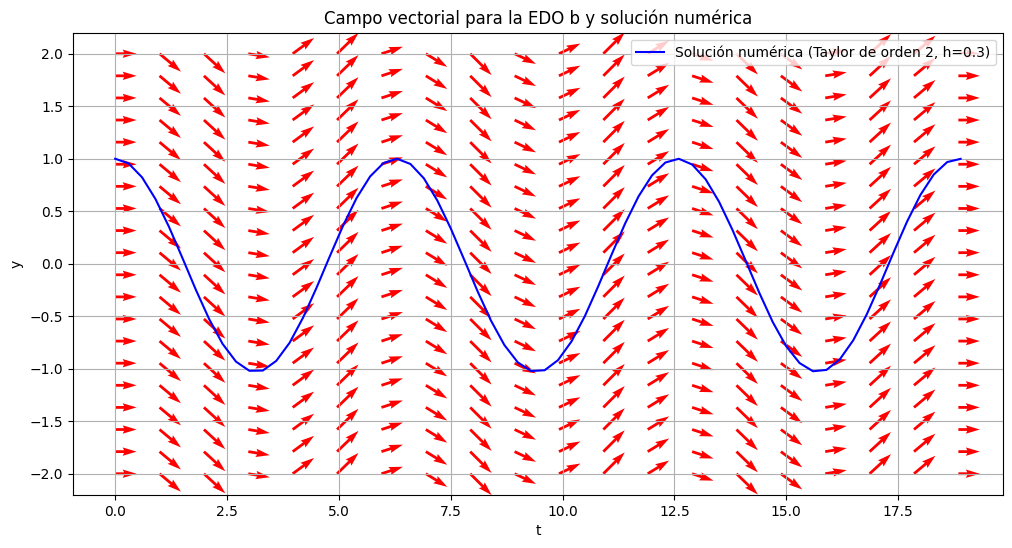

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Definición de las funciones

# EDO a)
def f_a(x, y):
    return 22 * np.exp(x / 5) - 5 * x - 25

# Solución exacta para a)
def exact_a(x):
    return -5 * x**2 / 2 - 25 * x + 110 * np.exp(x / 5) - 113

# EDO b)
def f_b(t, y):
    return -np.sin(t)

# Solución exacta para b)
def exact_b(t):
    return np.cos(t) + 0

# Derivada de f_b para Taylor de orden 2
def df_b(t, y):
    return -np.cos(t)

# Métodos numéricos
def euler(f, y0, x0, xf, h):
    x = np.arange(x0, xf + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1])
    return x, y

def heun(f, y0, x0, xf, h):
    x = np.arange(x0, xf + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        k1 = h * f(x[i-1], y[i-1])
        k2 = h * f(x[i-1] + h, y[i-1] + k1)
        y[i] = y[i-1] + (k1 + k2) / 2
    return x, y

def taylor2(f, df, y0, x0, xf, h):
    x = np.arange(x0, xf + h, h)
    y = np.zeros(len(x))
    y[0] = y0
    for i in range(1, len(x)):
        y[i] = y[i-1] + h * f(x[i-1], y[i-1]) + (h**2 / 2) * df(x[i-1], y[i-1])
    return x, y

# Función para graficar los resultados con diferentes pasos
def graficar_completo(h_a1, h_a2, h_b1, h_b2):
    # EDO a con h_a1
    x_euler_a1, y_euler_a1 = euler(f_a, -3, 0, 5, h_a1)
    x_heun_a1, y_heun_a1 = heun(f_a, -3, 0, 5, h_a1)
    x_taylor2_a1, y_taylor2_a1 = taylor2(f_a, lambda x, y: (22/5) * np.exp(x / 5) - 5, -3, 0, 5, h_a1)
    x_exact_a = np.linspace(0, 5, 1000)
    y_exact_a = exact_a(x_exact_a)

    plt.figure(figsize=(12, 6))
    plt.plot(x_exact_a, y_exact_a, label='Solución exacta', color='black')
    plt.plot(x_euler_a1, y_euler_a1, label=f'Euler (h={h_a1})', linestyle='--')
    plt.plot(x_heun_a1, y_heun_a1, label=f'Heun (h={h_a1})', linestyle='-.')
    plt.plot(x_taylor2_a1, y_taylor2_a1, label=f'Taylor de orden 2 (h={h_a1})', linestyle=':')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Comparación de métodos para la EDO a (h={h_a1})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # EDO a con h_a2
    x_euler_a2, y_euler_a2 = euler(f_a, -3, 0, 5, h_a2)
    x_heun_a2, y_heun_a2 = heun(f_a, -3, 0, 5, h_a2)
    x_taylor2_a2, y_taylor2_a2 = taylor2(f_a, lambda x, y: (22/5) * np.exp(x / 5) - 5, -3, 0, 5, h_a2)

    plt.figure(figsize=(12, 6))
    plt.plot(x_exact_a, y_exact_a, label='Solución exacta', color='black')
    plt.plot(x_euler_a2, y_euler_a2, label=f'Euler (h={h_a2})', linestyle='--')
    plt.plot(x_heun_a2, y_heun_a2, label=f'Heun (h={h_a2})', linestyle='-.')
    plt.plot(x_taylor2_a2, y_taylor2_a2, label=f'Taylor de orden 2 (h={h_a2})', linestyle=':')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title(f'Comparación de métodos para la EDO a (h={h_a2})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Comparación del error para EDO a
    error_euler_a = np.abs(y_exact_a - np.interp(x_exact_a, x_euler_a, y_euler_a))
    error_heun_a = np.abs(y_exact_a - np.interp(x_exact_a, x_heun_a, y_heun_a))
    error_taylor2_a = np.abs(y_exact_a - np.interp(x_exact_a, x_taylor2_a, y_taylor2_a))

    plt.figure(figsize=(12, 6))
    plt.plot(x_exact_a, error_euler_a, label='Error Euler')
    plt.plot(x_exact_a, error_heun_a, label='Error Heun')
    plt.plot(x_exact_a, error_taylor2_a, label='Error Taylor de orden 2')
    plt.xlabel('x')
    plt.ylabel('Error')
    plt.title('Comparación del error para la EDO a')
    plt.legend()
    plt.grid(True)
    plt.show()

    # EDO b con h_b1
    t_euler_b1, y_euler_b1 = euler(f_b, 1, 0, 6 * np.pi, h_b1)
    t_heun_b1, y_heun_b1 = heun(f_b, 1, 0, 6 * np.pi, h_b1)
    t_taylor2_b1, y_taylor2_b1 = taylor2(f_b, df_b, 1, 0, 6 * np.pi, h_b1)
    t_exact_b = np.linspace(0, 6 * np.pi, 1000)
    y_exact_b = exact_b(t_exact_b)

    plt.figure(figsize=(12, 6))
    plt.plot(t_exact_b, y_exact_b, label='Solución exacta', color='black')
    plt.plot(t_euler_b1, y_euler_b1, label=f'Euler (h={h_b1})', linestyle='--')
    plt.plot(t_heun_b1, y_heun_b1, label=f'Heun (h={h_b1})', linestyle='-.')
    plt.plot(t_taylor2_b1, y_taylor2_b1, label=f'Taylor de orden 2 (h={h_b1})', linestyle=':')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Comparación de métodos para la EDO b (h={h_b1})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # EDO b con h_b2
    t_euler_b2, y_euler_b2 = euler(f_b, 1, 0, 6 * np.pi, h_b2)
    t_heun_b2, y_heun_b2 = heun(f_b, 1, 0, 6 * np.pi, h_b2)
    t_taylor2_b2, y_taylor2_b2 = taylor2(f_b, df_b, 1, 0, 6 * np.pi, h_b2)

    plt.figure(figsize=(12, 6))
    plt.plot(t_exact_b, y_exact_b, label='Solución exacta', color='black')
    plt.plot(t_euler_b2, y_euler_b2, label=f'Euler (h={h_b2})', linestyle='--')
    plt.plot(t_heun_b2, y_heun_b2, label=f'Heun (h={h_b2})', linestyle='-.')
    plt.plot(t_taylor2_b2, y_taylor2_b2, label=f'Taylor de orden 2 (h={h_b2})', linestyle=':')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title(f'Comparación de métodos para la EDO b (h={h_b2})')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Campo vectorial para EDO b con solución numérica más precisa
    T, Y = np.meshgrid(np.linspace(0, 6 * np.pi, 20), np.linspace(-2, 2, 20))
    U = 1
    V = f_b(T, Y)
    plt.figure(figsize=(12, 6))
    plt.quiver(T, Y, U, V, color='r')
    plt.plot(t_taylor2_b1, y_taylor2_b1, label=f'Solución numérica (Taylor de orden 2, h={h_b1})', color='blue')
    plt.xlabel('t')
    plt.ylabel('y')
    plt.title('Campo vectorial para la EDO b y solución numérica')
    plt.legend()
    plt.grid(True)
    plt.show()

# Ejecutar la función con los valores deseados de h
h_a1 = 0.1
h_a2 = 0.5
h_b1 = 0.3
h_b2 = 0.7
graficar_completo(h_a1, h_a2, h_b1, h_b2)
